<img src="https://www.strath.ac.uk/media/1newwebsite/webteam/logos/xUoS_Logo_Horizontal.png.pagespeed.ic.M6gv_BmDx1.png" width="350" align="left" style="left">

# 2. Amplitude Modulation and Demodulation <a class="anchor" id="A_mod_demod"></a>

Amplitude Modulation is the process of modifying one signal by another through the altering of signal amplitude. This makes for a good introduction to the world of modulation as the process and circuit design are straightforward. The weakness of AM however is that upon reconstruction the signal will have halved in amplitude.

## Table of Contents

* [2. Amplitude Modulation and Demodulation](02_amplitude_modulation.ipynb)
    * [2.1 Amplitude Modulation of a Baseband Signal](#A_mod)
    * [2.2 Demodulation of the Baseband Signal](#A_demod)
    * [2.3 Demodulation Phase Error](#A_phase_error)

**Import Libraries**

For this notebook we will be using NumPy for computation and MatplotLib for Matlab-like visualisation of our waveforms as well as pystrath_sdr helper functions for plots.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pystrath_sdr.helper_functions import subplots, multi_subplots, complex_subplots, find_fft

### 2.1 Amplitude Modulation of a Baseband Signal <a class="anchor" id="A_mod"></a>

We will begin with a simple modulation scheme, mixing a low frequency baseband signal, $g(t)$, with a high frequency carrier, $c(t)$, to produce a modulated signal, $s(t)$. This signal can then be transmitted from an RF antenna. The designof the RF transmitter can be seen in [Figure 1](#fig-1).

<a class="anchor" id="fig-1"></a>
<figure>
<img src='./images/AM_mod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 1: Amplitude Modulation of a Baseband Signal</b></figcaption>
</figure>

In [1]:
fs = 1000000 # sample rate 
fb = 20000 # the frequency of the baseband signal
fc = 300000 # frequency of the carrier signal
A = 200 # baseband signal amplitude
n_window = fs # fft size

In [3]:
samples = np.arange(fs) # the points on the x axis for plotting - 0 to fs
t = samples/fs #samples per sampling rate - amount of time passed to process number of samples - array

freqs = np.fft.fftshift(np.fft.fftfreq(n_window,1/fs)) #frequency domain axis for graphs

First we define an input signal, $g(t)$:

$g(t) = A\cos(2 \pi f_{b} t)$

where A is the amplitude and $f_{b}$ is the frequency of the baseband signal.

For demonstration purposes a single tone signal will be used, however a more general baseband signal with frequency components from 0 to $f_{b}$ can be modulated with the same approach.

In [4]:
g = A*np.cos(2*np.pi*fb*t) 

This baseband information signal can be plotted in both time and frequency domains. 

We can observe a cosine with amplitude A in the time domain and a single tone at $f_{b}$ in the frequency domain.

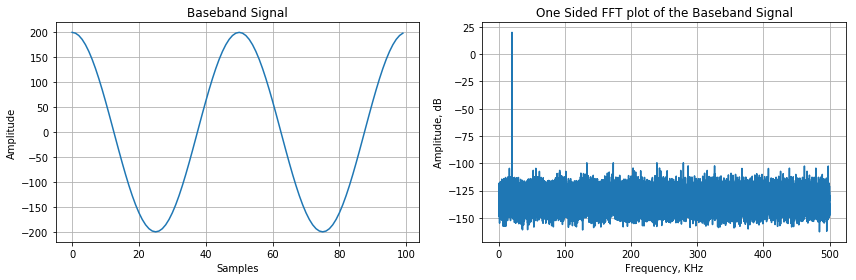

In [5]:
baseband_fft_db = find_fft(g, n_window)
time_title = 'Baseband Signal'
freq_title = 'One Sided FFT plot of the Baseband Signal'
subplots(g, baseband_fft_db, samples, freqs, fs, time_title, freq_title)

Similarly, a high frequency carrier signal can be defined. 

$c(t) = \cos(2 \pi f_{c} t)$

In [6]:
c = np.cos(2*np.pi*fc*t) 

We can now plot this carrier signal in time and frequency domains.

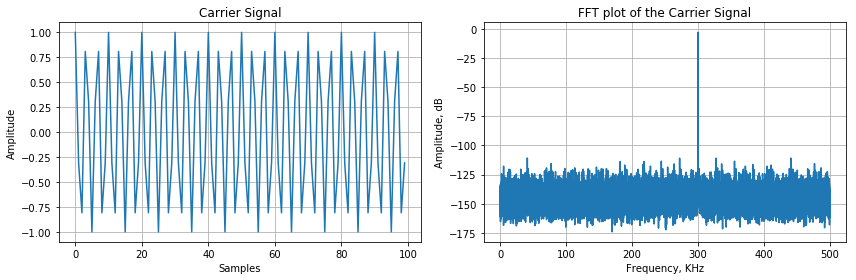

In [7]:
carrier_fft_db = find_fft(c, n_window)
time_title = 'Carrier Signal'
freq_title = 'FFT plot of the Carrier Signal'
subplots(c, carrier_fft_db, samples, freqs, fs, time_title, freq_title)

A modulated signal, $s(t)$, can now be obtained by multiplying our information signal, $g(t)$, by the carrier signal $c(t)$.

$s(t) = c(t) \times g(t)$

$s(t) = \cos(2 \pi f_{c} t) \times A\cos(2 \pi f_{b} t)$

Using trigonometry we can see that:

$s(t) = \frac{A}{2} \cos(2 \pi (f_{c} - f_{b}) t) + \frac{A}{2} \cos(2 \pi (f_{c} + f_{b}) t)$

In Python, this modulated signal can be easily obtained by mutliplying the carrier signal $c(t)$ by the information signal, $g(t)$:

In [8]:
s = g*c #information signal g(t) multiplied by carrier signal c(t)

We can plot the results of this modulation in time and frequency domain. 

In the frequency domain we can see frequency responses at $f_{c} - f_{b}$ and $f_{c} + f_{b}$. Therefore we must transmit data using a bandwidth of $2 f_{b}$

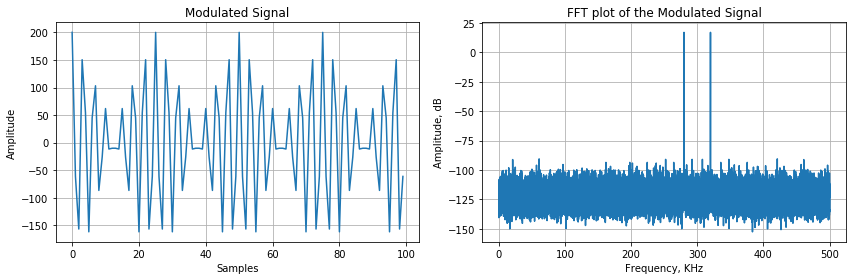

In [9]:
modulated_fft_db = find_fft(s, n_window)

time_title = 'Modulated Signal'
freq_title = 'FFT plot of the Modulated Signal'
subplots(s, modulated_fft_db, samples, freqs, fs, time_title, freq_title)

### 2.2 Demodulation of the Baseband Signal <a class="anchor" id="A_demod"></a>

At the receiver, this modulated signal can be 'perfectly' demodulated using a local carrier which matches the transmission carrier. The RF receiver design can be seen in [Figure 2](#fig-2).

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/AM_Demod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 2: Amplitude Demodulation of a Baseband Signal</b></figcaption>
</figure>

The modulated signal, $s(t)$, is multiplied by the carrier signal, $c(t)$, to produce a demodulated signal, $x(t)$.

$x(t) = c(t) \times s(t)$

$x(t) = \frac{A}{2} \cos(2 \pi f_{b} t) + \frac{A}{4} \cos(2 \pi (2f_{c} - f_{b}) t) + \frac{A}{4} \cos(2 \pi (2f_{c} + f_{b}) t)$

Within Python, this demodulation can be performed by multiplying the carrier signal, $c(t)$, by the received signal, $s(t)$.

In [10]:
x = c*s # multiplication of carrier and received signals to perform demodulation

This demodulated signal can now be plotted in time and frequency domains. 

We can see that the original information signal at $f_{b}$ has been successfully recovered, however unwanted high frequency components sitting around $2f_{c}$ are present. 

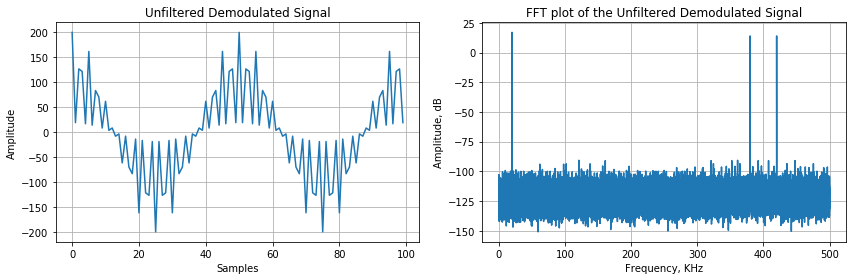

In [11]:
demodulated_fft_db = find_fft(x, n_window)

time_title = 'Unfiltered Demodulated Signal'
freq_title = 'FFT plot of the Unfiltered Demodulated Signal'
subplots(x, demodulated_fft_db, samples, freqs, fs, time_title, freq_title)

As we can see from the above figure, the demodulated signal has been successfully extracted, however unwanted high frequency components remain in the signal. These components can be removed using a lowpass filter, which we will design using the window method. This approach simply *windows* an ideal impulse response $h_d(n)$ by multiplying it by a window function $w(n)$:

$h(n) = w(n).h_d(n)$

For more information on filter design, please see the [Digital Filter Design notebook](./strath-sdr/rfsoc-studio/notebooks/pystrath-sdr/digital_filters/01_digital_filter_design.ipynb).

In [12]:
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

The lowpass filter can be applied to the demodulated signal using convolution. Within Python this can be performed simply by using np.convolve().

In [13]:
u = np.convolve(x, h)

The results of this low pass filter can be plotted, alongside the unfiltered signal. 

The 'cost' of amplitude scaling demodulation, as the name suggests, is a 50% amplitude scaling. This is particularly clear in the time domain plot. In the frequency domain we can clearly see that the high frequency components are removed, leaving only the desired baseband signal.

With the removal of the high frequency components, the desired output can be obtained as:

$u(t) = \frac{A}{2} \cos(2 \pi f_{b} t)$

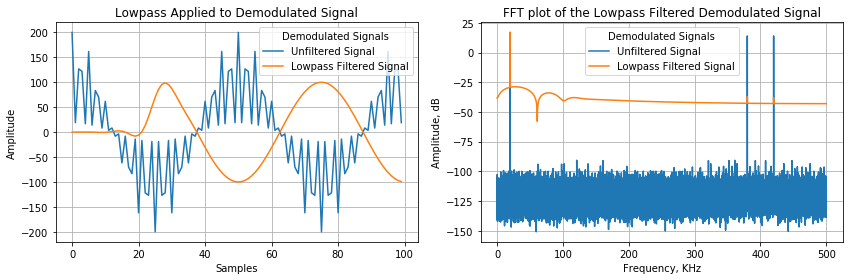

In [14]:
u_fft_db = find_fft(u, n_window)

time_title = 'Lowpass Applied to Demodulated Signal'
freq_title = 'FFT plot of the Lowpass Filtered Demodulated Signal'
label1 = 'Unfiltered Signal'
label2 = 'Lowpass Filtered Signal'
legend_title = 'Demodulated Signals'
#subplots(u[0:len(h)-1], u_fft_db, samples[0:len(h)-1], freqs, fs, time_title, freq_title)
multi_subplots(x, u, demodulated_fft_db, u_fft_db, samples, freqs, fs, 
               time_title, freq_title, label1, label2, legend_title)

### 2.3 Demodulation Phase Error <a class="anchor" id="A_phase_error"></a>

If the local oscillator is not exactly in phase with the received signal, the resulting phase error will cause an attenuation by a factor of $\cos(\theta)$.

In [15]:
phaseshift = (np.pi/3) #60 degree phase shift
phase_carrier = np.cos(2*np.pi*fc*t + phaseshift)
phase_modulation = phase_carrier*s

lowpass_phaseshift = np.convolve(phase_modulation, h)

This concept can be shown by plotting the low pass filtered demodulated signal again, but incorporating a phase error into the local carrier signal.

By using a phase error of $\frac{\pi}{3}$ we observe an attenuation of $\cos(\frac{\pi}{3}) = 0.5.$

Therefore, in the time domain we can observe an amplitude of $\frac{A}{4}$ compared to the transmitted signal. 

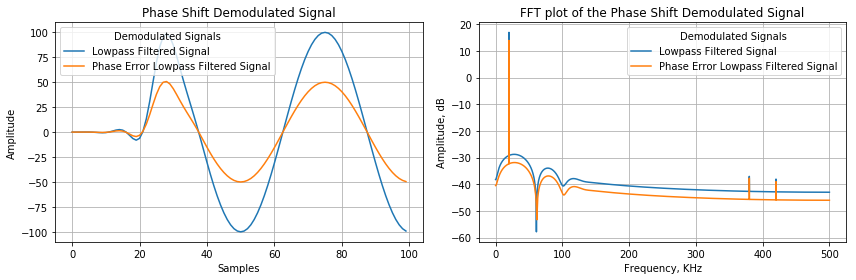

In [16]:
phaseshift_fft_db = find_fft(lowpass_phaseshift, n_window)

time_title = 'Phase Shift Demodulated Signal'
freq_title = 'FFT plot of the Phase Shift Demodulated Signal'
label1 = 'Lowpass Filtered Signal'
label2 = 'Phase Error Lowpass Filtered Signal'
legend_title = 'Demodulated Signals'

multi_subplots(u, lowpass_phaseshift, u_fft_db, phaseshift_fft_db, samples, freqs, fs, 
               time_title, freq_title, label1, label2, legend_title)

So far we have shown how amplitude modulation may be used to transmit a baseband signal at much higher frequencies whilst being able to recreate the original signal at the receiver. However we have encountered two issues:

1. Spectral inefficiency: the baseband is $f_{b}$ Hz wide but the modulated signal is $2f_{b}$. Therefore we require double the bandwidth to transmit the signal.

2. We assume that the local oscillator at the receiver is exactly in phase and of the same frequency as the transmitter. This clearly will not always be the case in a real system.

These problems can be addressed using QAM modulation schemes, addressed in the next notebook.

[⬅️ Previous Notebook](01_introduction.ipynb) | | [Next Notebook ➡️](02_amplitude_modulation.ipynb)

----
----